Hill Climbing
=======

# Theory
**Hill Climbing (HC)** is a local search optimization technique to approximate the local optimum of a function.

## Definition
**Hill Climbing (HC)** technique is straight forward, where it accept moves only in the direction of enhancing the cost "i.e. if the optimization task is minimization task, then it will accept moves that only reduce the cost". In that sense, hill climbing is the most simplistic and intuitive approach in solving local optimization tasks. Hill climbing technique guarantees that it will find local optima.


### Algorithm
To elaborate more on dynamics of hill climbing, lets illustrate the algorithm with this pusoducode.

<div style="text-align:center"><img src="./Resources/Hill Climbing-Algorithm.png" width="800"/></div>

We can see that hill climbing is iterative algorithm that starts with a solution candidate and then iteratively move to proposed solution candidates if they have better cost, otherwise it will terminate the search at the current solution candidate. 

The step of proposing a solution candidate is done by selecting the best cost neighbor from the current solution neighborhood. You can see this process in the following figure

<div style="text-align:center"><img src="./Resources/Hill Climbing-Neighbour.png" width="800"/></div>


### Neighborhood Definition
Defining the neighborhood is very tricky task and problem dependent. Bad definition of neighborhood can change the algorithm mechanics or alter it performance greatly. In hill climbing the neighborhood of a current solution is defined as the bounding box around it. However, how large this bounding box should be is the tricky part of the neighborhood definition.

## Examples
Hill climbing can be used to approximate the global optimal solution "either minima or maxima" to range of problems such as, not limited; the following:
- Mathematical function.
- N-Queens problem.
- Traveling sales man problem.

# Implementation


## Imports

In [1]:
import math
import matplotlib
import numpy as np
import pandas as pd
from typing import Callable
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
matplotlib.rcParams['animation.embed_limit'] = 2**128

## Parameters

In [2]:
# No general Parameters

## Algorithm
```mermaid
    flowchart LR

        x_0(Start with starting <br>solution x_0) --> Loop

        subgraph Loop
            direction LR

            select(Select a neighbor <br>of current solution) --> condition{Is neighbor cost better <br>than current cost?}
            condition --> |True| move(Move to neighbor)


        end

        condition --> |False| terminate[/Terminate/]
        
        terminate --> return(Return current solution)
        Loop --> return(Return current solution)
```

In [3]:
def HC(cost_func: Callable, get_neighborhood: Callable, x_0: float, maxiter: int = int(5e3)) -> tuple[float, list, int]:
    '''
    Hill climbing algorithm to approximate, at least; the local optimum of a given cost function

    Args:
        cost_func: Cost function, define a metic that solutions will be optimized for, the function should return float
        get_neighborhood : Function that provide the neighborhood around current x value, should return np array
        x_0: Search starting value
        maxiter: Maximum number of iterations "i.e. moving attempts". Defaults to int(5e3).

    Returns:
        The optimal x value of the cost function, the number of search moves, and the search
        history record.
    '''

    # algorithm data
    x = [x_0]
    cost = [cost_func(x_0)]

    for _ in range(maxiter-1):
        
        # select the best neighbor
        neighbors = get_neighborhood(x[-1])
        neighbors_costs = np.array([cost_func(neighbor) for neighbor in neighbors])
        best_neighbor = neighbors[ neighbors_costs.argsort()[0] ]

        # accept if neighbor is better
        if cost_func(best_neighbor) < cost_func(x[-1]):
            x.append(best_neighbor)
            cost.append(cost_func(best_neighbor))

        # terminate if neighbor is worse
        if cost_func(best_neighbor) > cost_func(x[-1]):
            break
        
    
    x_optimal, moves, history= x[-1], len(x), pd.DataFrame({"cost": cost, "x": x})

    return x_optimal, moves, history

## Results Visualization
In this section we will illustrate the results and behavior of hill climbing by solving the following problems
- Find global optima in a mathematical function
- Solve the N-Queens problem

We will illustrate the results of the algorithm in two means:
- gif Plot: Search process of algorithm to illustrate the conservative search behaver
- Moves Plot: Search moves taken and show the suggest global optima
- Parameters Tracking Plot: Tacking of x value and cost to shows how algorithm explore search space

### Optima of Mathematical Function

In [4]:
# cost function and neighborhood definition
def cost_func(x: float) -> float:
    '''
    The cost is calculated use a mathematical expression "i.e. the mathematical function to be optimized"
    '''
    return 30*np.sin(x) + x**2

def get_neighborhood(x: float) -> np.array:
    '''
    The neighborhood around x is defined as the list of numbers that is close to x within a given range "i.e.
    an interval around x => [x-5, x+5]". Note that x is excluded from this list.
    '''
    interval_around_x = np.linspace(x-0.1, x+0.1) 
    return interval_around_x[ interval_around_x != x ]

# starting value search
x_0 = 8

In [5]:
x_optimal, moves, history = HC(cost_func=cost_func,
                               get_neighborhood=get_neighborhood,
                               x_0=x_0
                               )

In [6]:
%%capture
fig, ax = plt.subplots(figsize=(6,6))

# fine domain and range limits
xx = np.linspace(history["x"].min()-8, history["x"].max()+3, num=100)
y_lim = [np.min(cost_func(xx))-0.2*np.ptp(cost_func(xx)), np.max(cost_func(xx))+0.2*np.ptp(cost_func(xx))]

# simulated annealing sampling animation 
## statics components
main_function,      = ax.plot(xx, cost_func(xx), "k")
sample_x_ticks,     = ax.plot([history["x"][0]], [y_lim[0]], "r|", clip_on=False, zorder=100)
sample_line,        = ax.plot([], [], "r--")
sample_point,       = ax.plot([], [], "ro")

## decorations
ax.set(xlabel="x", ylabel="f(x)", ylim=y_lim, title="Hill Climbing moves")
ax.grid(True)

def animate(frame: int) -> tuple:

    ## animated components
    sample_line.set_data([history["x"][frame], history["x"][frame]], [y_lim[0], cost_func(history["x"][frame])])
    sample_point.set_data([history["x"][frame]], [cost_func(history["x"][frame])])
    sample_x_ticks.set_data([history["x"][:frame]], [y_lim[0]])

    return sample_line, sample_point, sample_x_ticks

ani = FuncAnimation(fig, animate, frames=len(history["x"]), blit=True, interval=30)

ani.save('./Resources/Hill Climbing-Result.gif', writer=PillowWriter(fps=20))

<div style="text-align:center"><img src="./Resources/Hill Climbing-Result.gif" width="500"/></div>  
<em>If the gif is not updated, please reopen the notebook.</em>

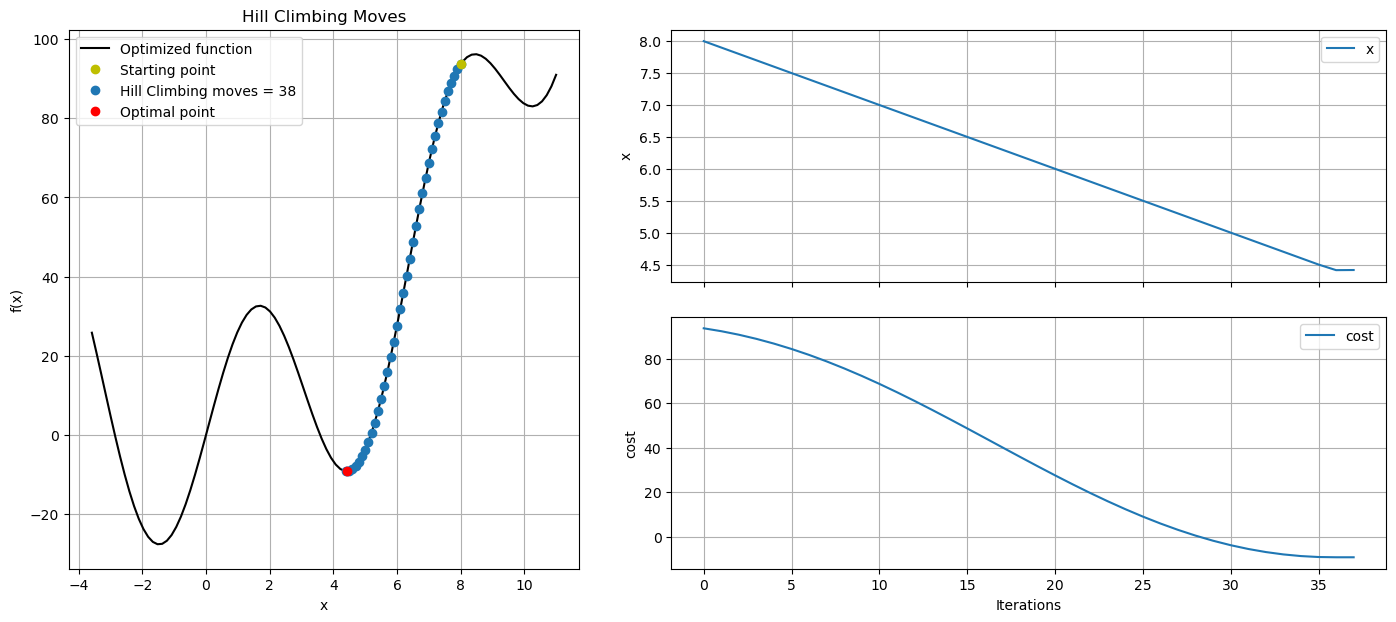

,Property,Value
0,optimal x,4.414286
1,cost at optimal x,-9.19094
2,total search moves,38 moves


In [7]:
fig, ax = plt.subplot_mosaic([['upper left', 'upper right'],
                              ['upper left', 'lower right']],
                             figsize=(17,7), gridspec_kw={'width_ratios': [1, 1.4]})


# hill climbing moves plot
ax['upper left'].plot(xx, cost_func(xx), "k", label="Optimized function")
ax['upper left'].plot(history["x"][0], cost_func(history["x"][0]), "yo", label="Starting point", zorder=4)
ax['upper left'].plot(history["x"], cost_func(history["x"]), "o", label=f"Hill Climbing moves = {moves}")
ax['upper left'].plot(x_optimal, cost_func(x_optimal), "ro", label="Optimal point")
ax['upper left'].set(xlabel="x", ylabel="f(x)", title="Hill Climbing Moves")
ax['upper left'].grid(True)
ax['upper left'].legend()

# x value tracking
ax['upper right'].plot(history["x"], label="x")
ax['upper right'].xaxis.set_ticklabels([])
ax['upper right'].set(ylabel="x")
ax['upper right'].grid(True)
ax['upper right'].legend()

# cost value tracking
ax['lower right'].plot(history["cost"], label="cost")
ax['lower right'].set(xlabel="Iterations", ylabel="cost")
ax['lower right'].grid(True)
ax['lower right'].legend()

# summary
summary = [
    ("optimal x", x_optimal),
    ("cost at optimal x", cost_func(x_optimal)),
    ("total search moves", f'{len(history["x"])} moves'),
    ]

df = pd.DataFrame(data=summary, columns=["Property", "Value"])

plt.subplots_adjust(wspace=0.15, hspace=0.14)
plt.show()
df

### N-Queens Problem
The following link will provide information on the problem
https://en.wikipedia.org/wiki/Eight_queens_puzzle

In [8]:
def cost_function(queens: np.array) -> float:
    '''
    The cost is calculated by counting the total number of attacks on the board. The attacks considered in this cost function are vertical, 
    horizontal and diagonal attacks. It should be noted that comitative attacks are counted once "For example, a vertical attack from Queen_i 
    on Queen_j is that same as the vertical attack from Queen_j on Queen_i, hence they are counted as 1 attack together"
    '''
    # collect queens positions in vertical and right/left diagonal lines "position described by line index"
    vertical_positions = queens
    right_diagonal_positions = -1*( 1*queens - np.arange(len(queens))*-1 )
    left_diagonal_positions  = -1*( -1*queens - np.arange(len(queens))*-1 )
    
    # check for attacks, by checking if they share same line index
    cost = 0
    for queen_positions in [vertical_positions, right_diagonal_positions, left_diagonal_positions]:
        _, counts = np.unique(queen_positions, return_counts=True)
        if any(counts > 1):
           cost += sum([math.comb(queens_same_axis, 2) for queens_same_axis in counts[counts > 1]])
    
    return cost

def get_neighborhood(queens: np.array) -> np.array:
    '''
    The neighborhood around a given board configuration "i.e. queens" is defined as the list of boards that is close to the current configuration. Close 
    is defined by the following, any board where one queen is shifted either two steps, or less; to the right or to the left in the board while keep other
    queens positions the same
    '''
    N = len(queens)
    neighborhood = []
    for i in range(N):
        
        for shift in [1,2]:
            # shift a queen to right and left
            shift = shift*np.eye(1,N, k=i).reshape((N))
            neighbor1 = queens + shift
            neighbor2 = queens - shift

            # test validity of neighbors
            if np.all(neighbor1 <= N-1):
                neighborhood.append(neighbor1)

            if np.all(neighbor2 >= 0):
                neighborhood.append(neighbor2)
      
    return np.array(neighborhood)

def print_board(ax, queens: np.array) -> None:
    '''
    Function that take the board configuration "i.e. queens" and print it using matplotlib
    '''
    N = len(queens)
    # create pixels matrix and plot
    board = np.array([[[0.5,0.5,0.5] if (pixel_i+pixel_j)%2 
                       else [1,1,1] for pixel_i in range(N)] for pixel_j in range(N)])
    ax.imshow(board, interpolation='nearest')
    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    # add queens
    [ax.text(x, y, u'\u2655', size=30, ha='center', va='center') for y, x in enumerate(queens)]
    
    return ax

# search starting value
board_size = 4
queens_0 = np.random.choice(range(board_size), size=board_size)

In [9]:
x_optimal, moves, history = HC(cost_func=cost_function,
                               get_neighborhood=get_neighborhood,
                               x_0=queens_0
                               )

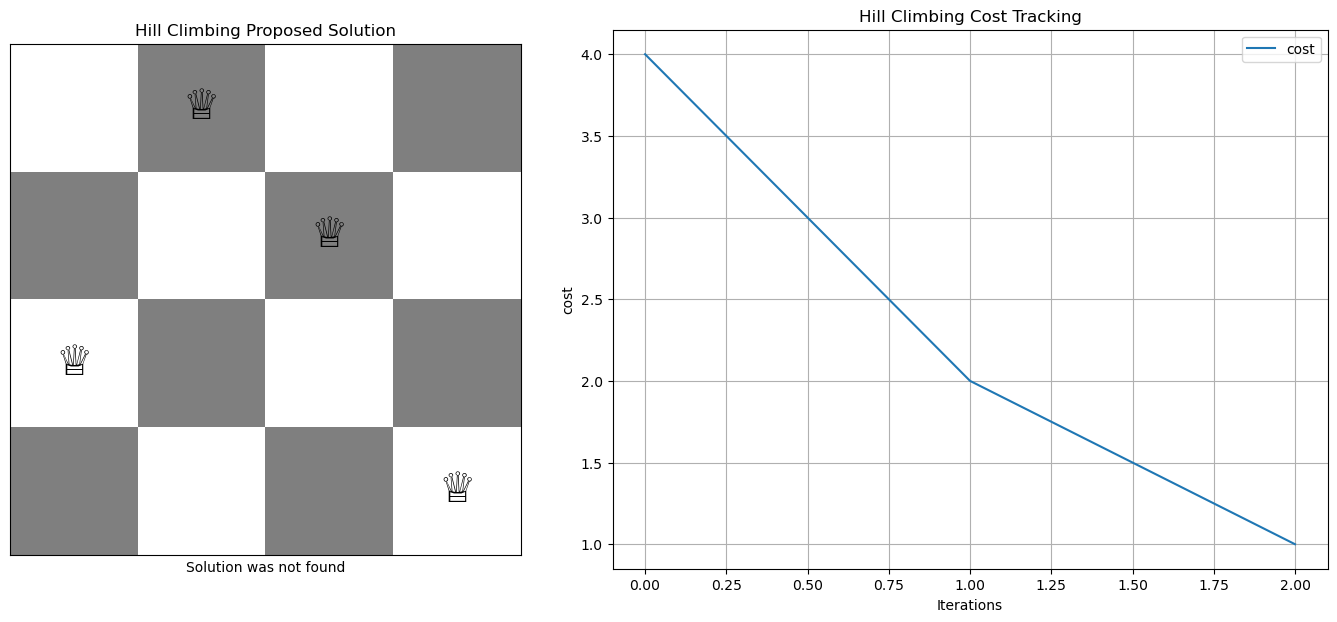

,Property,Value
0,optimal queens configuration,"[1.0, 2.0, 0.0, 3.0]"
1,cost at optimal configuration,1
2,total search moves,3 moves


In [10]:
fig, ax = plt.subplot_mosaic([['upper left', 'upper right']],
                             figsize=(17,7), gridspec_kw={'width_ratios': [1, 1.4]})


# hill climbing solution proposal plot
print_board(ax['upper left'], x_optimal)
solution = "Solution was found" if history["cost"].iloc[-1] == 0  else "Solution was not found"
ax['upper left'].set(xlabel= solution, title="Hill Climbing Proposed Solution")

# cost value tracking
ax['upper right'].plot(history["cost"], label="cost")
ax['upper right'].set(xlabel="Iterations", ylabel="cost", title="Hill Climbing Cost Tracking")
ax['upper right'].grid(True)
ax['upper right'].legend()

# summary
summary = [
    ("optimal queens configuration", x_optimal),
    ("cost at optimal configuration", cost_function(x_optimal)),
    ("total search moves", f'{len(history["x"])} moves'),
    ]

df = pd.DataFrame(data=summary, columns=["Property", "Value"])

plt.subplots_adjust(wspace=0.15, hspace=0.14)
plt.show()
df